In [1]:
import altair as alt
import csv
import numpy as np
import organize_functions
from os import listdir
import pandas as pd
import pprint
import re
import sort_bus_by_date
import seaborn as sns
from IPython.display import HTML

import matplotlib.pyplot as plt

In [2]:
directory = organize_functions.find_directory()

In [3]:
directory

'/mnt/d/Documents/Capstone/KCM-Data/Organization/Raw data/False_files_2/'

# Module for finding modules that are replaced.

In [81]:
def find_replaced_modules(directory):
    serial_index = 17
    bus_swapped_mods = {}  # Storing modules that have been swapped with each bus number
    for folder in listdir(directory):
        if folder.startswith('bus'):
            bus = folder
            bus_slash = folder + '/'
            replaced_mods = set()  # For storing modules that are confirmed swapped in and out
            modules_by_date = {}  # Storing every module per date
            serial_start_end = {}  # Storing each unique module (from set) and their starting and end times
            mod_set = set()  # A set (unordered, no repeats) of all module numbers in the bus folder
#             case of letter (i.e. to avoid A1 != a1)
            for file in listdir(directory + bus_slash):  # For each bus folder
                df = sort_bus_by_date.sort_bus_by_date(directory, bus_slash)  # Sarah's dataframe for organized files
                ordered_dates = []  # List of ordered dates per bus folder
                ordered_csv = df['Filename'].tolist()  # List of sorted CSV's by date
                ordered_unclean_dates = df['DateRetrieved'].tolist()  # List of sorted dates corresponding to CSVs
                for unclean_date in ordered_unclean_dates:
                    split_results = unclean_date.strftime('%m/%d/%Y, %H:%M:%S')
                    ordered_dates.append(split_results)  # Organized dates as strings
#                 print(ordered_dates)

                for i in range(len(ordered_csv)):
                    serials_in_csv = []
                    file_path = directory + bus_slash + ordered_csv[i]
                    with open(file_path) as file:
                        reader = csv.reader(file)
                        for row in reader:
                            for element in row:
                                if 'Mfg Data (ASCII)' in element:
                                    serial_num = element[serial_index:]
                                    mod_num = re.sub(r'\W+', '', serial_num).upper()
                                    if mod_num != '':
                                        serials_in_csv.append(mod_num)  # Serials in CSV will all be regex version
                                        mod_set.add((mod_num, serial_num))  # Adding tuple with the regex and non-regex version
                                    else:
                                        pass
                                else:
                                    pass
                    modules_by_date[ordered_dates[i]] = serials_in_csv  # Date to list of serials
                # Purpose of this section is just to get a module number associated with start and end date
                for serial_tuple in mod_set:  # Look through every serial number in bus
                    count = 0
                    first_date = ''
                    latest_date = ''
                    start_end_list = []
                    base_serial = serial_tuple[0]  # Current serial of interest
                    
                    for each_date in ordered_dates:  # For each date (keys to current_date_serials dictionary)
                        current_date_serials = modules_by_date[each_date]  # Getting list of the serials for current CSV/date
                        for comp_serial in current_date_serials:
                            if base_serial == comp_serial:  # Compare base serial to comparison serial 
                                count += 1
                                latest_date = each_date
#                                 print("Current date: ", each_date, "\nCurrent latest date: ", latest_date)
                                if count == 1:
                                    first_date = each_date
                                    start_end_list.append(first_date)
                                else:
                                    pass
                    start_end_list.append(latest_date)
                    serial_start_end[serial_tuple[1]] = start_end_list  # Uncleaned serial -> start and end dates
                    
#                 # Now compare start and end dates for each module to the first and last date of the ordered_csvs by date list

#                 pprint.pprint(serial_start_end)  # For pretty printing dictionary
#                 print("Length of the serial dictionary: ", len(serial_start_end), "\nLength of mod set: ", len(mod_set))
                for serial_key in serial_start_end:
                    start_end = serial_start_end[serial_key]
#                     print(start_end)
# #                     print('Key : ', serial_key, "\nStart and End Dates: ", start_end, "\n")
#                     print("Start Date: ", start_end[0], "\nFirst Date: ", ordered_dates[0], "\nEnd Date: ", start_end[-1],  "\nLast Date: ", ordered_dates[-1], "\n")
                    if start_end[-1] != ordered_dates[-1]:
                        replaced_mods.add(serial_key)
                bus_swapped_mods[bus] = list(replaced_mods)
#                 print(replaced_mods)
    return {k:v for k,v in bus_swapped_mods.items() if v}


In [82]:
replaced_mods = find_replaced_modules(directory)
replaced_mods

{'bus_1': [' 364A1585G3REVA-13L3260..........',
  ' 364A1585G3REVA-13L3269..........',
  ' 364A1585G3REV--13G2284..........',
  ' 364A1585G3REVA-13L3263..........',
  ' 364A1585G3REVA-13L3259..........',
  ' 364A1585G3REVA-13L3266..........',
  ' 364A1585G3REVA-13L3267..........',
  ' 364A1585G3REVA-13L3268..........',
  ' 364A1585G3REVA-13L3265..........',
  ' 364A1585G3REVA-13L3257..........',
  ' 364A1585G3REVA-13L3255..........',
  ' 364A1585G3REVA-13L3264..........',
  ' 364A1585G3REVA-13L3261..........',
  ' 364A1585G3REVA-13L3262..........',
  ' 364A1585G3REV--13G2469..........',
  ' 364A1585G3REVA-13L3258..........'],
 'bus_10': [' 364A1585G3REVA-13L3287..........',
  ' 364A1585G3REVA-13L3282..........',
  ' 364A1585G3REVA-13L3285..........',
  ' 364A1585G3REVA-13L3289..........',
  ' 364A1585G3REVA-13L3290..........',
  ' 364A1585G3REVA-13L3296..........',
  ' 364A1585G3REVA-13L3288..........',
  ' 364A1585G3REVA-13L3291..........',
  ' 364A1585G3REVA-13L3283..........',
  ' 3

In [88]:
sum = 0
for key in replaced_mods:
    sum += len(replaced_mods[key])
sum

1513

In [6]:
replaced_mods['bus_36']

[' 364A1585G3REVB-14E6891..........',
 ' 364A1585G3REVB-14F7320..........',
 ' 364A1585G3REVB-14E6785..........']

In [7]:
count = 0
for bus in replaced_mods:
    serial_nums = replaced_mods[bus]
    count += len(serial_nums)
count

21

# Function for creating dataframes for desired characteristic

### Function takes in characteristic argument. 

#### Please use one of the following

1. **'cell voltages'** for acquiring data for the module cell (submodule) voltages.
2. **'balancers'** for acquiring data for the module cell balancers.
3. **'temperatures'** for acquiring data for the module temperatures.
4. **'module voltages'** for acquiring data for the overall module voltages.

In [8]:
def swapped_mod_dataframes(directory, serial_num, characteristic):
    serial_index = 17
    mod_num = re.sub(r'\W+', '', serial_num).upper()  # Convert the serial number provided
#     print(mod_num)
    keyword = 'Mfg Data'
    index_dictionary = {
        'cell voltages': [5, 7, 8, 20],
        'balancers': [21, 23, 24, 36],
        'temperatures': [37, 39, 40, 42],
        'module voltages': [43, 45, 46, 47]
#         Numbers correspond to the number of rows from the module number row that needs to be skipped in order to reach
#         the following: title_row, column_row, start_index of data values, end_index of values
    }
    title_ind = 0
    col_ind = 1
    start = 2
    end = 3
    empty_space = -2
    key_list = index_dictionary.keys()
    list_bus_nums = []
    list_desired_dfs = []
    for file in listdir(directory):  # Place this file in directory with False_files -> Keiton's code
            if file.startswith('bus'):
                list_bus_nums.append(file)  # Getting list of bus names
    for bus in list_bus_nums:  # For each bus
        ordered_dates = []
        df = sort_bus_by_date.sort_bus_by_date(directory, bus + '/')
        ordered_csv = df['Filename'].tolist()
        ordered_unclean_dates = df['DateRetrieved'].tolist()
        for unclean_date in ordered_unclean_dates:
            split_results = unclean_date.strftime('%m/%d/%Y, %H:%M:%S')
            ordered_dates.append(split_results)
        for csv_file in range(len(ordered_csv)):  # Iterate over each csv file in the current bus folder
            directory_path = directory + bus + '/' + ordered_csv[csv_file]  # Convert this to file name (for file in bus folder)
#             df_rows = []
            row_list = []
            with open(directory_path) as file:  # Read in the CSV file specified as a list of rows
                reader = csv.reader(file)
                for row in reader:
                    row_list.append(row)
            for i in range(len(row_list)):  # For each row in row_list
                for element in row_list[i]:
                    if element is not None:
                        if keyword in element:
                            mod_num_test = re.sub(r'\W+', '', element[serial_index:]).upper()
                            if mod_num_test == mod_num:
#                                 print('Bus Number: ', bus, '\nDates: ', ordered_dates)
                                indices_list = index_dictionary[characteristic.lower()]
                                title = row_list[i + indices_list[title_ind]][0] + '  ' + ordered_dates[csv_file]
                                # Concatenate with Module Number (key to dictionary)
                                full_column_labels = row_list[i + indices_list[col_ind]][1:]
                                column_labels = [element for element in full_column_labels if element]
                                data_vals = []
                                row_labels = []
                                for j in range(indices_list[start], indices_list[end]):
#                                     print(row_list[i + j])
                                    full_row = row_list[i + j][1:]
                                    clean_row = [element for element in full_row if element]
#                                     print(clean_row)
                                    data_vals.append(clean_row)
                                    row_labels.append(row_list[i + j][0])
                                df_characteristic = pd.DataFrame(data=data_vals, columns=column_labels, index=row_labels)
#                                     df_voltage.dropna(how='all', axis=1, inplace=True)
#                                     df_voltage = df_voltage.drop('TOTAL', 1)
#                                     df_voltage = df_voltage.rename(columns=str).rename(columns={'None':'TOTAL'})
#                                     df_voltage = df_voltage.style.set_caption(title)
                                for label in column_labels:
                                    df_characteristic[label] = df_characteristic[label].astype('int')
                                index = df_characteristic.index
                                index.name = title
                                list_desired_dfs.append(df_characteristic)
    return list_desired_dfs

In [91]:
desired_dfs_1 = swapped_mod_dataframes(directory, replaced_mods['bus_1'][0], 'cell voltages')

In [10]:
desired_dfs_2 = swapped_mod_dataframes(directory, replaced_mods['bus_36'][0], 'balancers')

In [11]:
desired_dfs_3 = swapped_mod_dataframes(directory, replaced_mods['bus_2'][0], 'balancers')

In [92]:
desired_dfs_1[0]

,< 2.0,2.0,2.2,2.4,2.6,2.8,3.0,3.2,3.4,3.6,3.8,>= 4.0,TOTAL
"<Cell Voltages (V)> 09/26/2016, 06:07:22",,,,,,,,,,,,,
CELL 1,0,0,0,17,9238,903931,4034241,22526709,3312966,605155,153,0,31392410
CELL 2,0,0,0,10,3505,629681,4121421,22981957,3317244,338591,1,0,31392410
CELL 3,0,0,0,16,12342,1045148,3979977,22353587,2375290,549179,169,0,30315708
CELL 4,0,0,0,8,3459,651117,4115627,22946087,3316808,359298,3,0,31392407
CELL 5,0,0,0,16,12905,1060539,3971311,22342442,3286955,718088,153,0,31392409
CELL 6,0,0,0,8,2856,617855,4120269,23008783,3316457,326180,1,0,31392409
CELL 7,0,0,0,14,10711,1024044,3985445,22398983,3288308,684840,64,0,31392409
CELL 8,0,0,0,9,3241,647063,4116519,22955212,3318485,351879,1,0,31392409
CELL 9,0,0,0,16,15480,1112737,3951350,22272271,3283860,756412,283,0,31392409


In [13]:
replaced_mods['bus_1'][0]
# For showing the serial number

' 364A1585G3REV--13G2284..........'

In [14]:
df_1 = desired_dfs_1[0]

In [15]:
sns.set()

Text(0, 0.5, 'Time [seconds]')

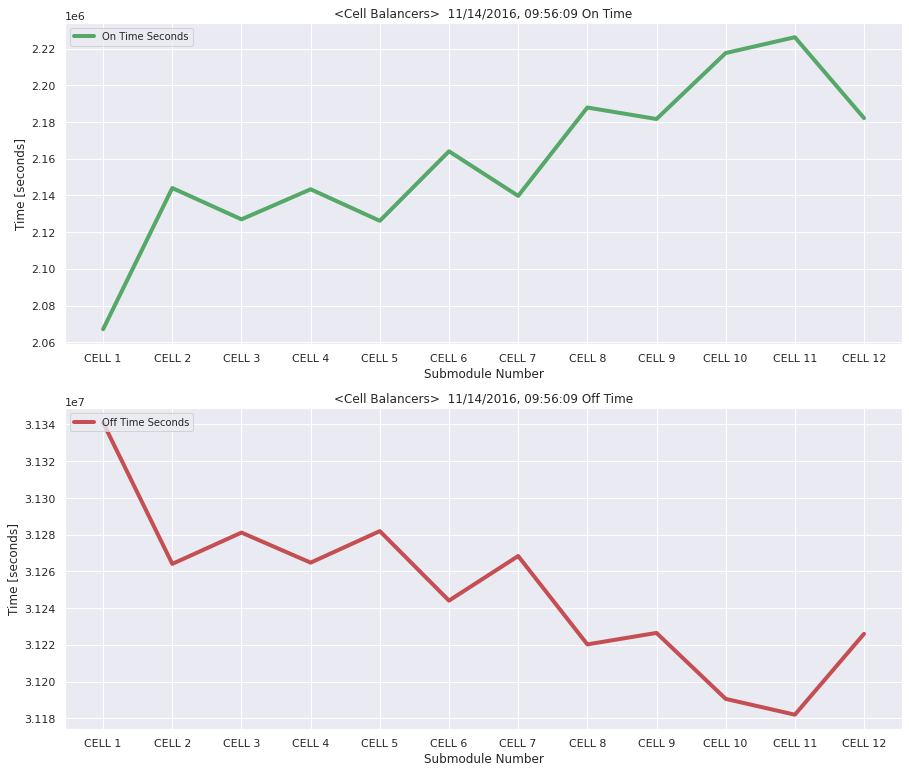

In [28]:
labels = df_1.index  # for x-axis of graphs
# on off can be two different lines, different colors
title = df_1.index.name
off_data = df_1['Off']
on_data = df_1['On']
total_data = df_1['TOTAL']
row_label = [i for i in range(0, 13)]

fig = plt.figure(figsize=(15, 13))
ax = fig.subplots(nrows=2)

ax[0].set_title(title + ' On Time')
ax[0].plot(labels, on_data,label='On Time Seconds', color='g', linewidth=4)
ax[0].legend(loc='upper left', fontsize='small')
ax[0].set_xlabel('Submodule Number')
ax[0].set_ylabel('Time [seconds]')
ax[1].set_title(title + ' Off Time')
ax[1].plot(labels, off_data,label='Off Time Seconds', color='r', linewidth=4)
ax[1].legend(loc='upper left', fontsize='small')
ax[1].set_xlabel('Submodule Number')
ax[1].set_ylabel('Time [seconds]')
# Add x and y labels

In [24]:
desired_dfs_5 = swapped_mod_dataframes(directory, replaced_mods['bus_1'][0], 'temperatures')

In [74]:
df_5 = desired_dfs_5[0]
temperature_dict = {}
for index, row in df_5.iterrows():
    row = row.tolist()
    row.pop(-1)
    temperature_dict[index] = row
temperature_dict.keys()

dict_keys(['TEMP SENSOR 1', 'TEMP SENSOR 2'])

In [75]:
temperature_dict['TEMP SENSOR 1']

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 24356,
 83317,
 375717,
 1093563,
 2975509,
 7975484,
 8306362,
 8847087,
 3199315,
 508987,
 18334,
 50,
 13,
 4,
 1,
 1,
 0,
 0]

Text(0, 0.5, 'Time [seconds]')

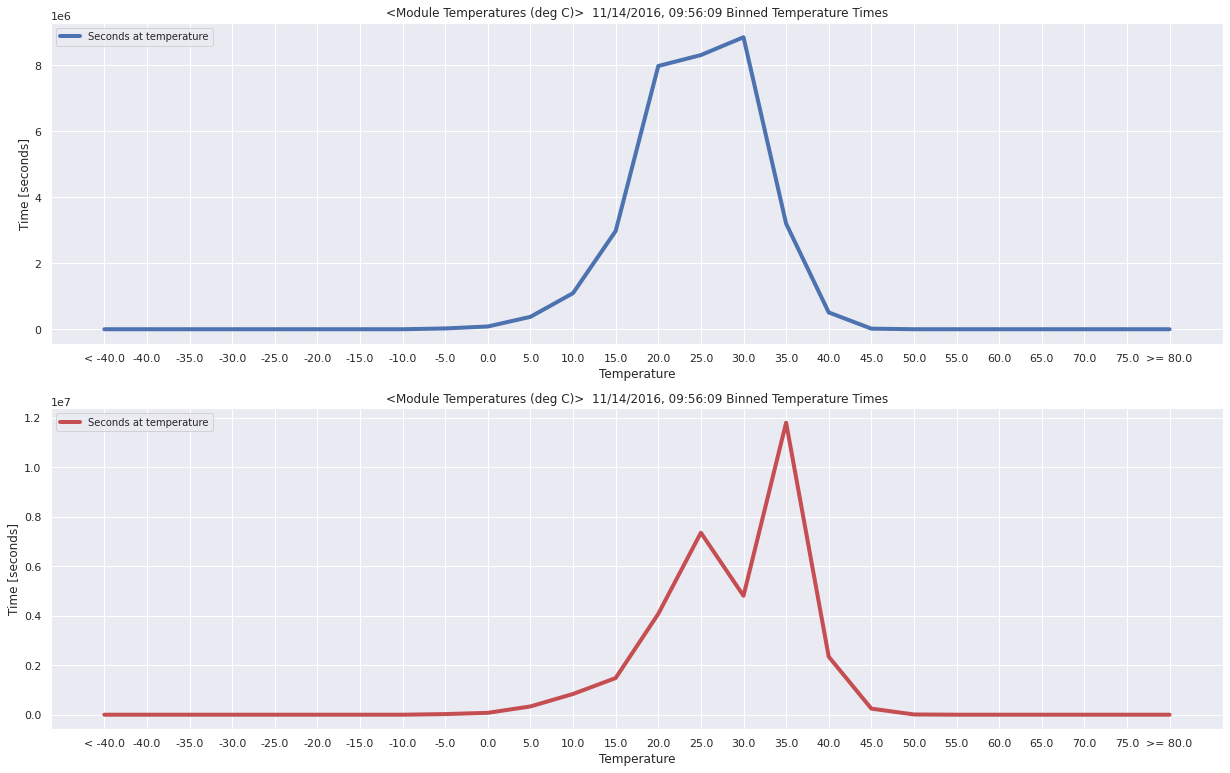

In [77]:
labels = df_5.columns.drop('TOTAL')  # for x-axis of graphs
# on off can be two different lines, different colors
# print(labels)
title = df_5.index.name
sensor_1 = temperature_dict['TEMP SENSOR 1']
sensor_2 = temperature_dict['TEMP SENSOR 2']

fig = plt.figure(figsize=(21, 13))
ax = fig.subplots(nrows=2)
# fig.tight_layout()

ax[0].set_title(title + ' Binned Temperature Times')
ax[0].plot(labels, sensor_1,label='Seconds at temperature', color='b', linewidth=4)
ax[0].legend(loc='upper left', fontsize='small')
ax[0].set_xlabel('Temperature')
ax[0].set_ylabel('Time [seconds]')
ax[1].set_title(title + ' Binned Temperature Times')
ax[1].plot(labels, sensor_2,label='Seconds at temperature', color='r', linewidth=4)
ax[1].legend(loc='upper left', fontsize='small')
ax[1].set_xlabel('Temperature')
ax[1].set_ylabel('Time [seconds]')

In [17]:
# sns.kdeplot x label can be the row labels 
# data is the time
# sns.kdeplot(data=on_data, x=row_label)
on_data

<Cell Balancers>  11/14/2016, 09:56:09
CELL 1     2067111
CELL 2     2144011
CELL 3     2126964
CELL 4     2143335
CELL 5     2126158
CELL 6     2164020
CELL 7     2139737
CELL 8     2187858
CELL 9     2181610
CELL 10    2217533
CELL 11    2226152
CELL 12    2182100
Name: On, dtype: int64

### Non-swapped Mod

In [18]:
# For curiosity purposes:
non_swapped_mod_1 = '364A1585G3REVA-13L3261..........'
desired_dfs_4 = swapped_mod_dataframes(directory, non_swapped_mod_1, 'balancers')

In [19]:
df_2 = desired_dfs_4[0]
df_3 = desired_dfs_4[1]

Text(0, 0.5, 'Time [seconds]')

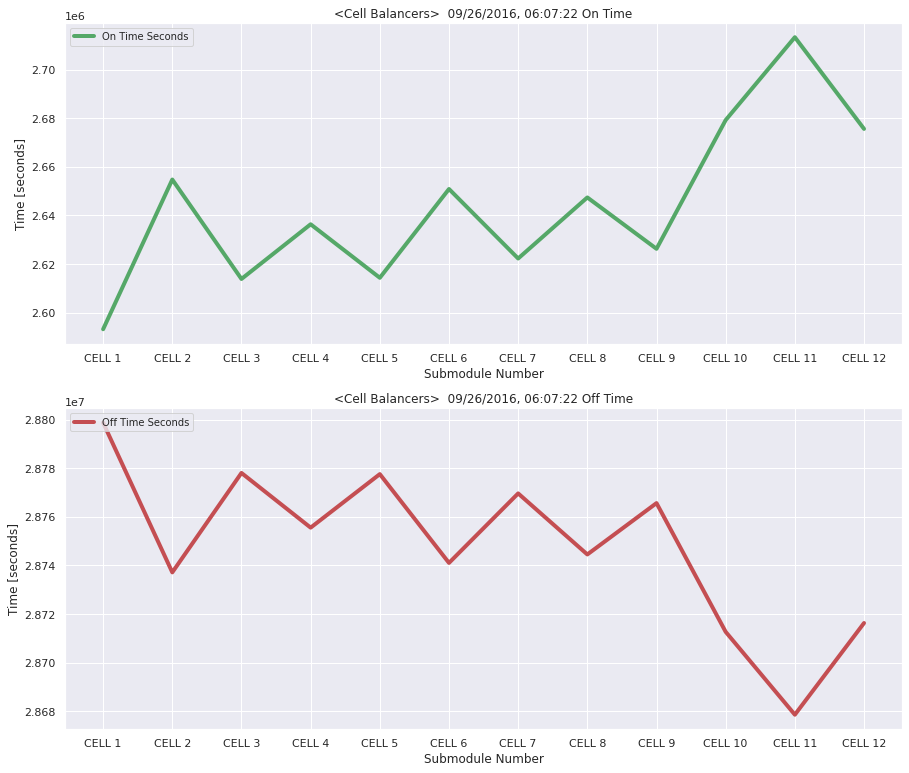

In [29]:
labels = df_2.index  # for x-axis of graphs
# on off can be two different lines, different colors
title = df_2.index.name
off_data = df_2['Off']
on_data = df_2['On']
total_data = df_2['TOTAL']

fig = plt.figure(figsize=(15, 13))
ax = fig.subplots(nrows=2)

ax[0].set_title(title + ' On Time')
ax[0].plot(labels, on_data,label='On Time Seconds', color='g', linewidth=4)
ax[0].legend(loc='upper left', fontsize='small')
ax[0].set_xlabel('Submodule Number')
ax[0].set_ylabel('Time [seconds]')
ax[1].set_title(title + ' Off Time')
ax[1].plot(labels, off_data,label='Off Time Seconds', color='r', linewidth=4)
ax[1].legend(loc='upper left', fontsize='small')
ax[1].set_xlabel('Submodule Number')
ax[1].set_ylabel('Time [seconds]')

In [52]:
desired_dfs_6 = swapped_mod_dataframes(directory, non_swapped_mod_1, 'temperatures')

In [58]:
desired_dfs_6[0]

,< -40.0,-40.0,-35.0,-30.0,-25.0,-20.0,-15.0,-10.0,-5.0,0.0,...,40.0,45.0,50.0,55.0,60.0,65.0,70.0,75.0,>= 80.0,TOTAL
"<Module Temperatures (deg C)> 09/26/2016, 06:07:22",,,,,,,,,,,,,,,,,,,,,
TEMP SENSOR 1,0,0,0,0,0,0,0,0,31776,115663,...,133849,3376,0,0,0,0,0,0,0,31392464
TEMP SENSOR 2,0,0,0,0,0,0,0,0,4681,89111,...,1894729,100870,5136,0,0,0,0,0,0,31392464


In [78]:
df_6 = desired_dfs_6[0]
temperature_dict_2 = {}
for index, row in df_6.iterrows():
    row = row.tolist()
    row.pop(-1)
    temperature_dict_2[index] = row
temperature_dict_2.keys()

dict_keys(['TEMP SENSOR 1', 'TEMP SENSOR 2'])

Text(0, 0.5, 'Time [seconds]')

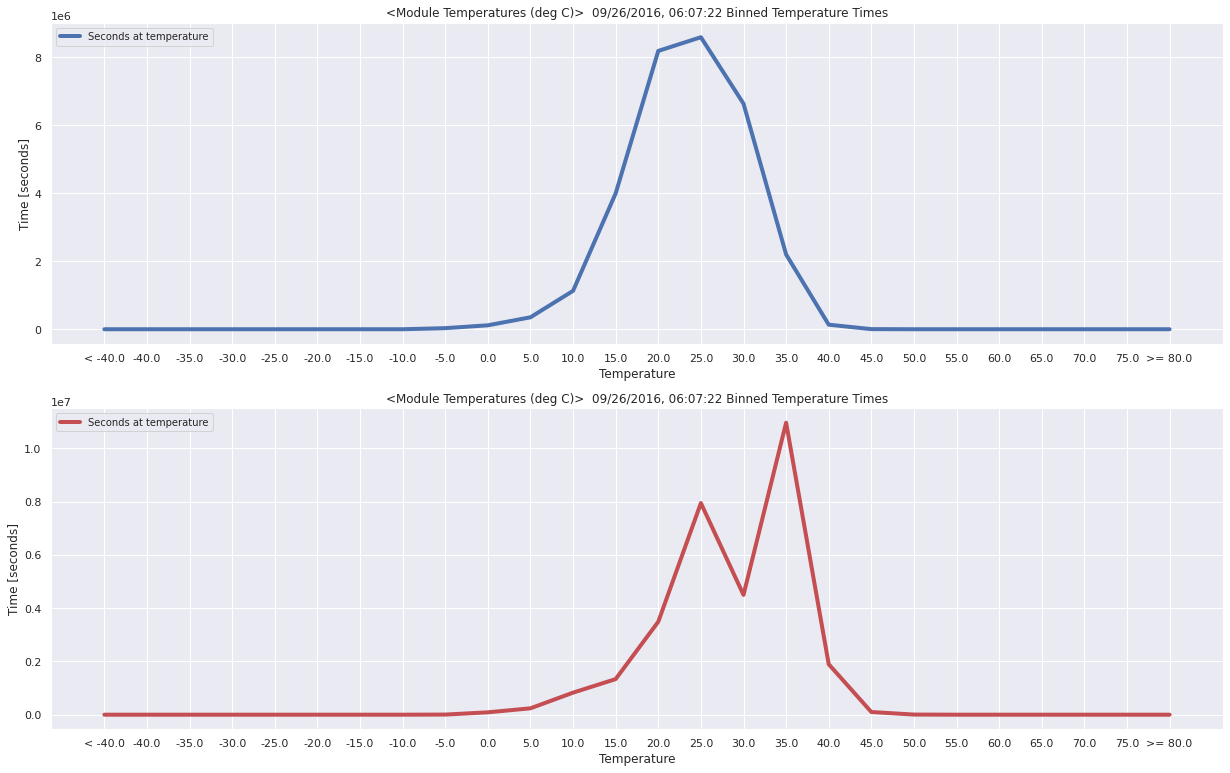

In [80]:
labels = df_6.columns.drop('TOTAL')  # for x-axis of graphs
# on off can be two different lines, different colors
# print(labels)
title = df_6.index.name
sensor_1 = temperature_dict_2['TEMP SENSOR 1']
sensor_2 = temperature_dict_2['TEMP SENSOR 2']

fig = plt.figure(figsize=(21, 13))
ax = fig.subplots(nrows=2)
# fig.tight_layout()

ax[0].set_title(title + ' Binned Temperature Times')
ax[0].plot(labels, sensor_1,label='Seconds at temperature', color='b', linewidth=4)
ax[0].legend(loc='upper left', fontsize='small')
ax[0].set_xlabel('Temperature')
ax[0].set_ylabel('Time [seconds]')
ax[1].set_title(title + ' Binned Temperature Times')
ax[1].plot(labels, sensor_2,label='Seconds at temperature', color='r', linewidth=4)
ax[1].legend(loc='upper left', fontsize='small')
ax[1].set_xlabel('Temperature')
ax[1].set_ylabel('Time [seconds]')

### Other Swapped Mods

Text(0, 0.5, 'Time [seconds]')

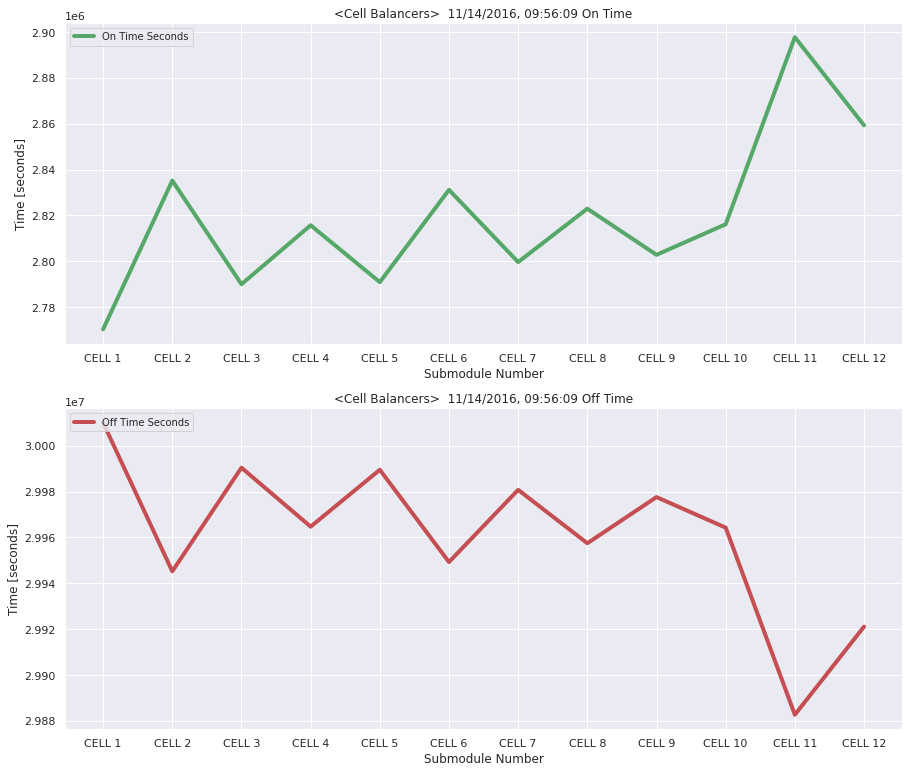

In [30]:
labels = df_3.index  # for x-axis of graphs
# on off can be two different lines, different colors
title = df_3.index.name
off_data = df_3['Off']
on_data = df_3['On']
total_data = df_3['TOTAL']

fig = plt.figure(figsize=(15, 13))
ax = fig.subplots(nrows=2)

ax[0].set_title(title + ' On Time')
ax[0].plot(labels, on_data,label='On Time Seconds', color='g', linewidth=4)
ax[0].legend(loc='upper left', fontsize='small')
ax[0].set_xlabel('Submodule Number')
ax[0].set_ylabel('Time [seconds]')
ax[1].set_title(title + ' Off Time')
ax[1].plot(labels, off_data,label='Off Time Seconds', color='r', linewidth=4)
ax[1].legend(loc='upper left', fontsize='small')
ax[1].set_xlabel('Submodule Number')
ax[1].set_ylabel('Time [seconds]')
# Add x and y labels

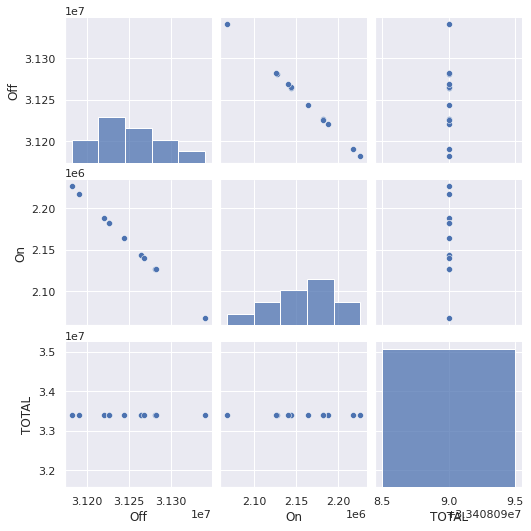

In [22]:
sns.pairplot(data=df_1)

In [23]:
alt.Chart(desired_dfs[0]).mark_bar().encode(
values = [{}]
)

NameError: name 'desired_dfs' is not defined

In [ ]:
df = pd.DataFrame({"Letters": ["a", "b", "c"], "Numbers": [1, 2, 3]})
index = df.index
index.name = "Index Title"

print(df, index.name)
# index

In [63]:
ser = pd.Series([1,2,3])
ser.pop(0)
ser

1    2
2    3
dtype: int64